In [14]:
import sys
import os

modul_path = os.path.join(os.path.dirname(os.getcwd()), "src" )
sys.path.append(modul_path)

from file_processing import csv_reader

data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "met_data.csv")

rain_data = csv_reader(data_path, 'sum(precipitation_amount P1D)')
print(rain_data)


{'2015-01-01T00:00:00.000Z': {'sum(duration_of_sunshine P1D)': {'value': np.float64(0.0), 'unit': 'hours'}, 'sum(precipitation_amount P1D)': {'value': np.float64(39.4), 'unit': 'mm'}}, '2015-01-02T00:00:00.000Z': {'sum(duration_of_sunshine P1D)': {'value': np.float64(0.0), 'unit': 'hours'}, 'sum(precipitation_amount P1D)': {'value': np.float64(6.6), 'unit': 'mm'}}, '2015-01-03T00:00:00.000Z': {'sum(duration_of_sunshine P1D)': {'value': np.float64(0.0), 'unit': 'hours'}, 'sum(precipitation_amount P1D)': {'value': np.float64(4.4), 'unit': 'mm'}}, '2015-01-04T00:00:00.000Z': {'sum(duration_of_sunshine P1D)': {'value': np.float64(0.0), 'unit': 'hours'}, 'sum(precipitation_amount P1D)': {'value': np.float64(3.6), 'unit': 'mm'}}, '2015-01-05T00:00:00.000Z': {'sum(duration_of_sunshine P1D)': {'value': np.float64(0.0), 'unit': 'hours'}, 'sum(precipitation_amount P1D)': {'value': np.float64(0.0), 'unit': 'mm'}}, '2015-01-06T00:00:00.000Z': {'sum(duration_of_sunshine P1D)': {'value': np.float64(

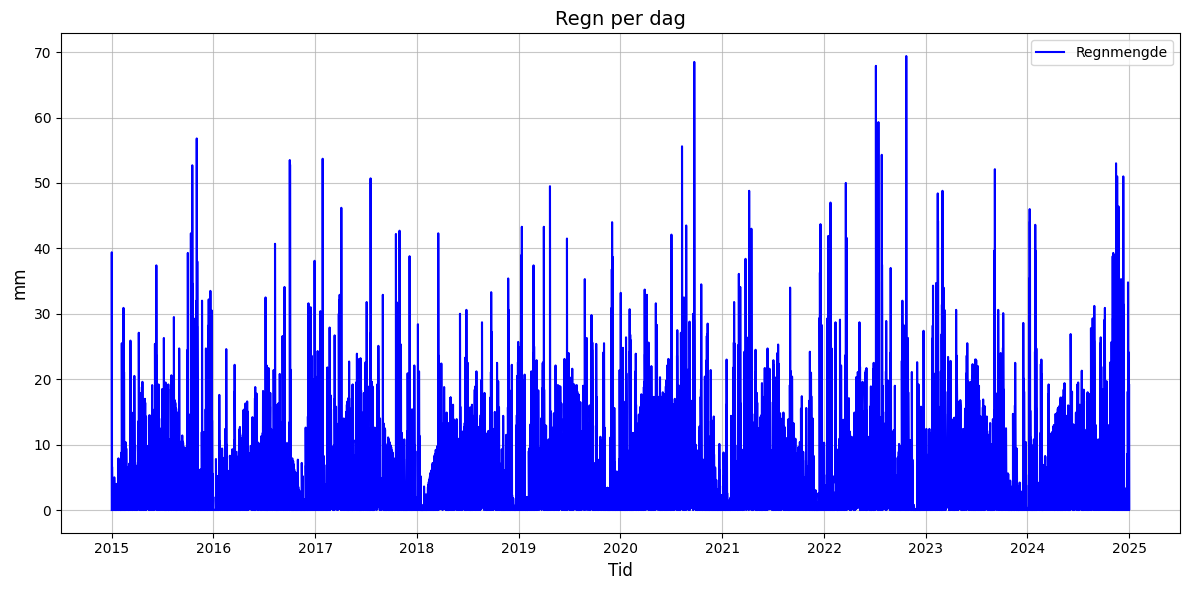

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

def plot_rain(data):
    """
    Plotting data over time.

    Data in the form: dict, {time: {Element: {value: (størrelse), unit: "Navn på y-aksen"}}}
    """

    # Ekstraher tidspunkter, verdier og enhet
    times = []
    values = []
    y_axis_label = None

    for time, elements in data.items():
        for element, details in elements.items():
            # Konverter ISO 8601-strengen til datetime-objekt
            times.append(datetime.datetime.fromisoformat(time.rstrip("Z")))  
            values.append(details["value"])
            y_axis_label = details["unit"]  

    # Opprett figur
    plt.figure(figsize=(12, 6))
    plt.plot(times, values, color="b", linestyle='-', marker='', label="Regnmengde")

    plt.xlabel("Tid", fontsize=12)
    plt.ylabel(y_axis_label, fontsize=12)
    plt.title("Regn per dag", fontsize=14)

    # **Velg smarte x-ticks for å unngå overfylte datoer**
    num_ticks = 10  # Antall x-ticks vi ønsker
    tick_indices = np.linspace(0, len(times) - 1, num_ticks, dtype=int)  # Velg likefordelte punkter
    tick_labels = [times[i].strftime('%Y-%m') for i in tick_indices]  # Vis kun år og måned

    plt.grid(True, alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_rain(rain_data)
